In [1]:
import sys
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    BASE_DIR = "/content"
    print("You are working on Google Colab.")
    print(f'Files will be downloaded to "{BASE_DIR}".')
    # adjust release
    GIT_ROOT = "https://github.com/blueprints-for-text-analytics-python/early-release/raw/master"
else:
    BASE_DIR = "../"
    print("You are working on a local system.")
    print(f'Files will be searched relative to "{BASE_DIR}".')

You are working on a local system.
Files will be searched relative to "../".


In [2]:
import nltk

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2

In [4]:
pd.options.display.max_colwidth = 150 ###
file = f"{BASE_DIR}/data/un-general-debates/un-general-debates-blueprint.csv.gz"
df = pd.read_csv(file)
df.sample(2, random_state=53)
### Table tab-data-sample: Sample of the UN General Debates Data

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


In [5]:
len(df.index)

7507

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [9]:
df.describe(include="O")

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,PAK,Congo,Seyoum Mesfin,Minister for Foreign Affairs,"Allow me first to\ncongratulate you, Sir, on your election as President of the\nGeneral Assembly. Canadians are proud to have\naccompanied you and..."
freq,46,46,12,1813,1


In [10]:
df["text_length"] = df["text"].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
text_length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [11]:
df[["country", "speaker"]].describe(include="O").T

,count,unique,top,freq
country,7507,199,PAK,46
speaker,7480,5428,Seyoum Mesfin,12


In [12]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
text_length        0
dtype: int64

In [13]:
df["speaker"].fillna("unknown", inplace=True)

In [14]:
df[df["speaker"].str.contains("Bush")]["speaker"].value_counts()

George W. Bush        4
Mr. George W. Bush    2
George Bush           1
Bush                  1
Mr. George W Bush     1
Name: speaker, dtype: int64

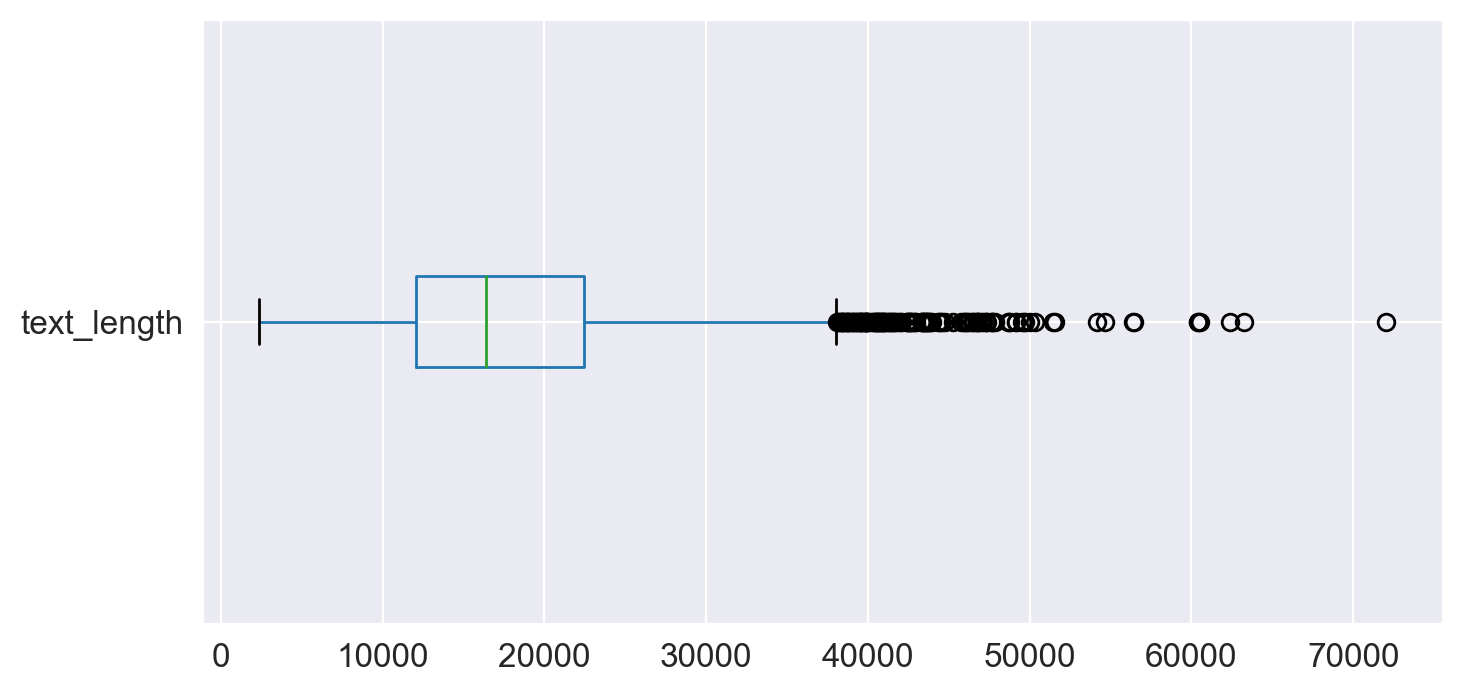

In [15]:
df["text_length"].plot(kind="box", vert=False)

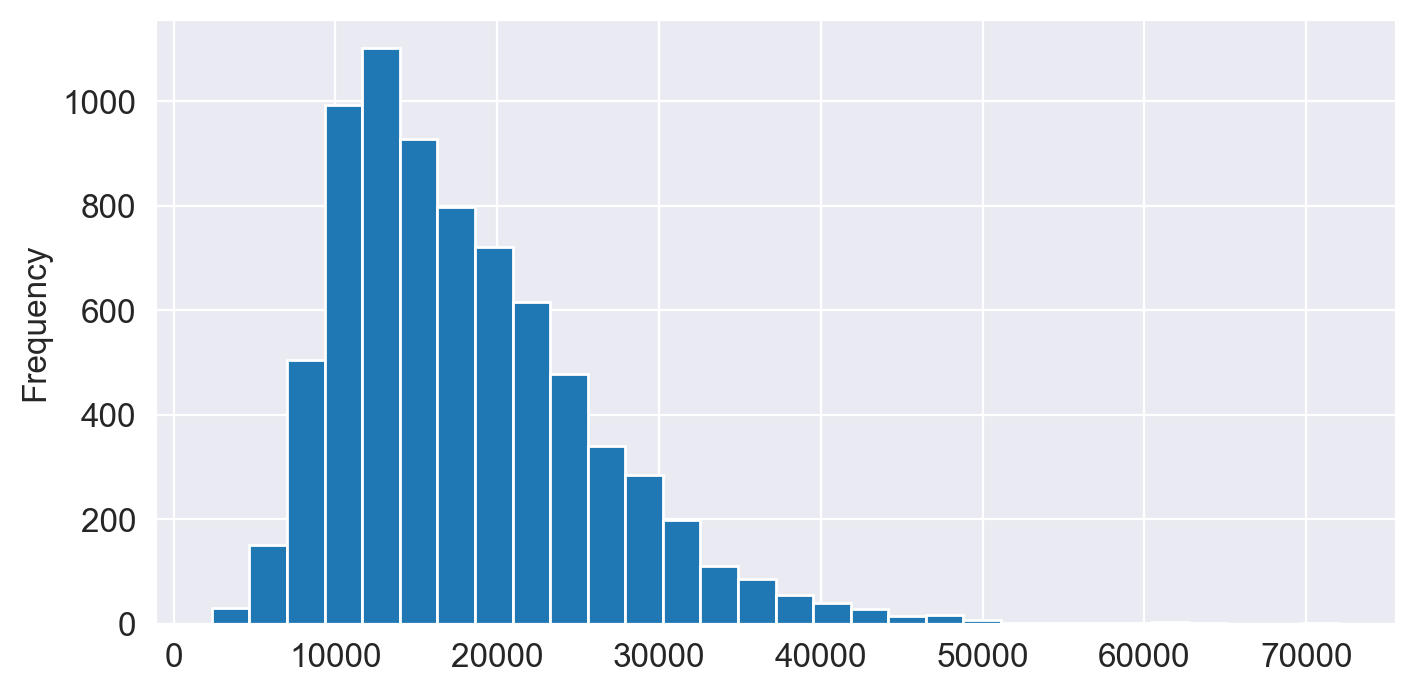

In [16]:
df["text_length"].plot(kind="hist", bins=30)

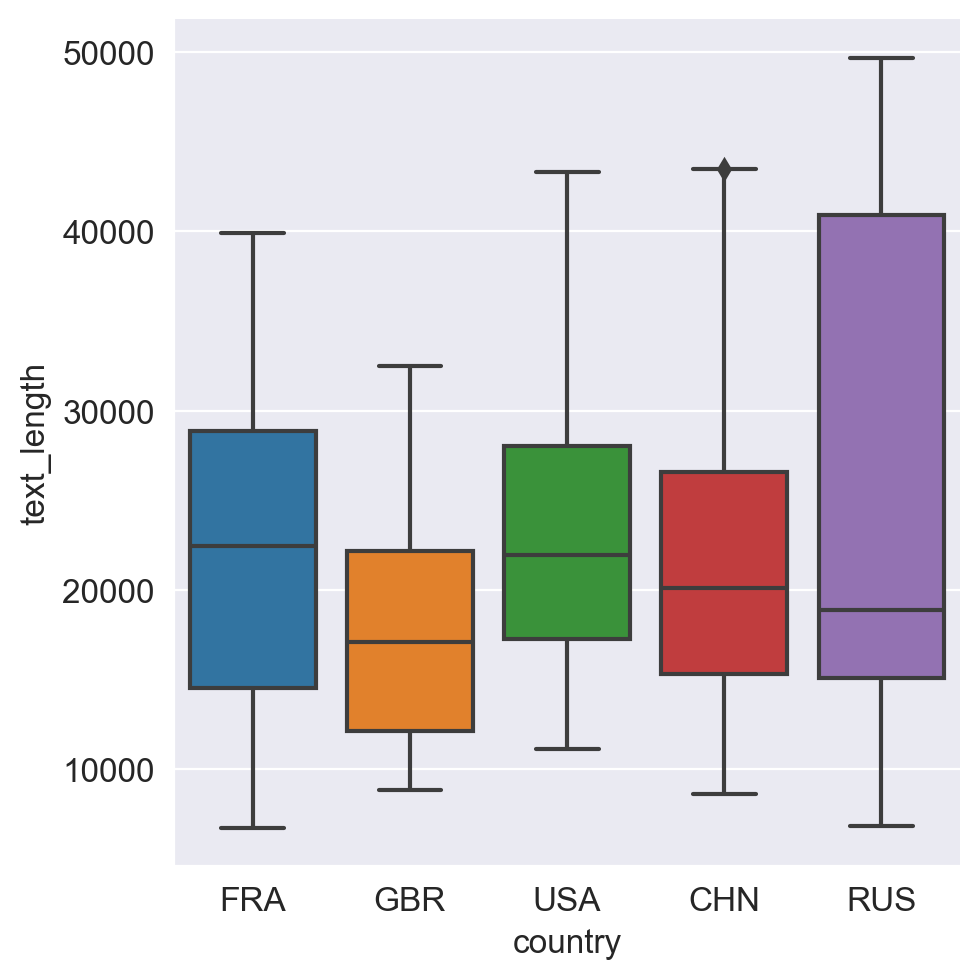

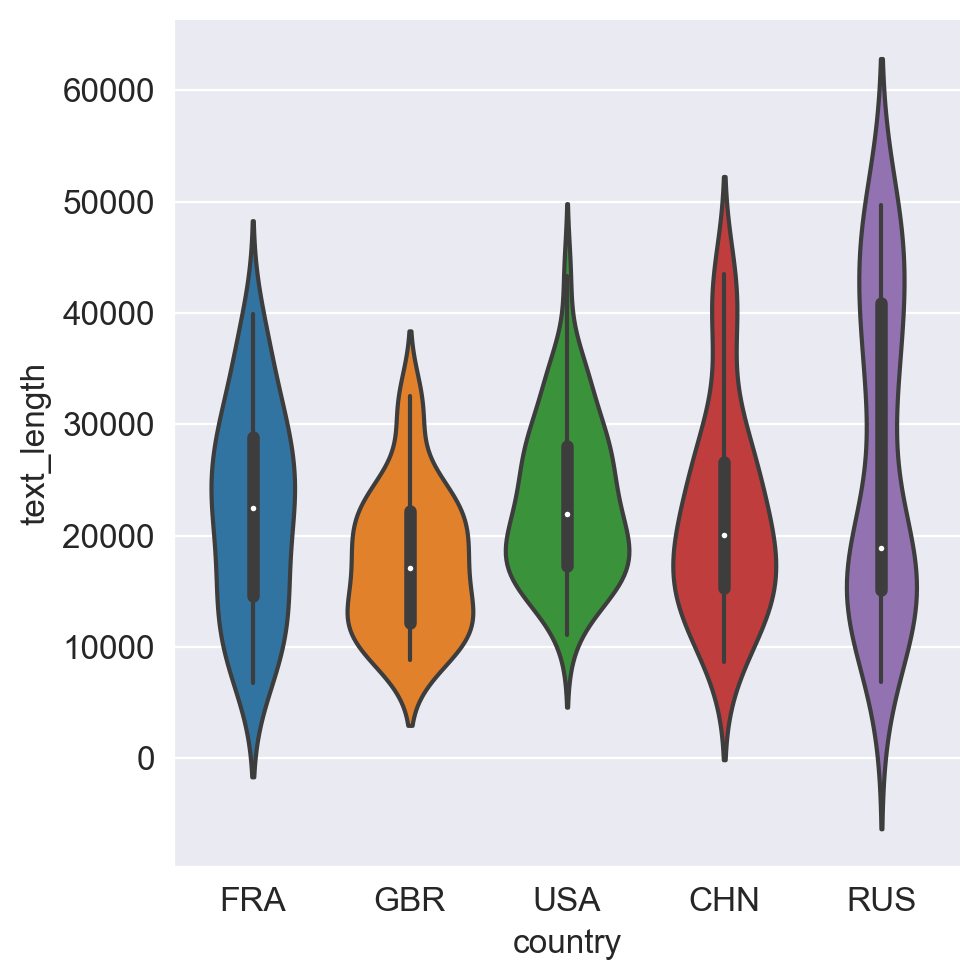

In [18]:
where = df["country"].isin(["USA", "FRA", "GBR", "CHN", "RUS"])
sns.catplot(data=df[where], x="country", y="text_length", kind="box")
sns.catplot(data=df[where], x="country", y="text_length", kind="violin")

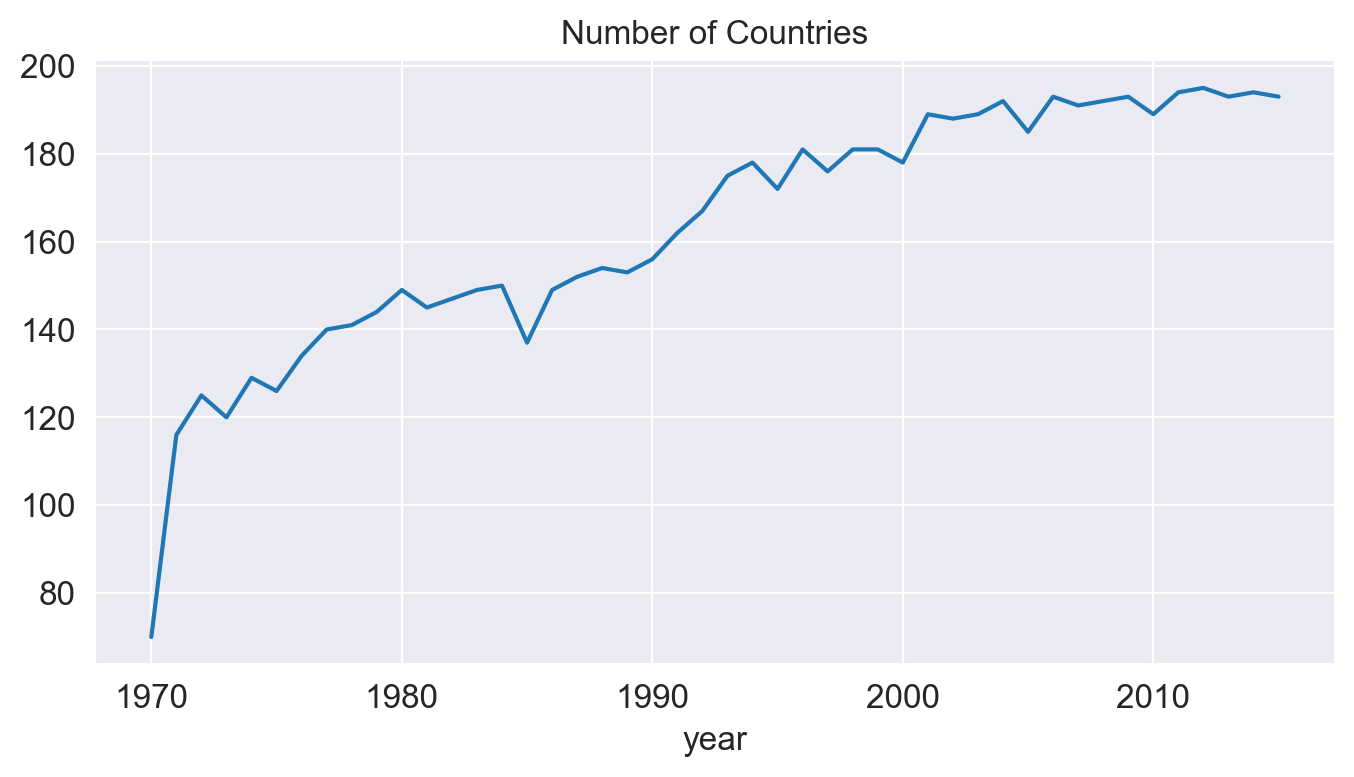

In [19]:
df.groupby("year").size().plot(title="Number of Countries")

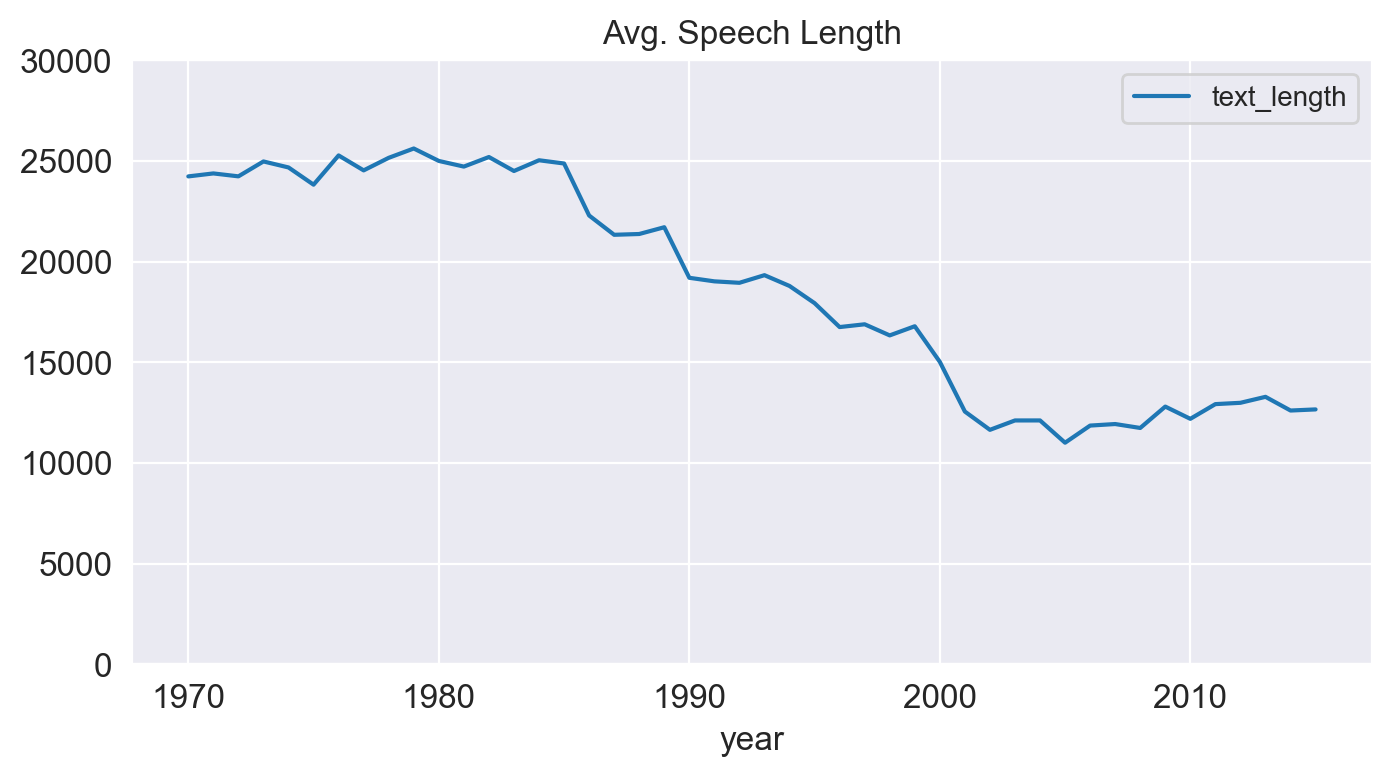

In [20]:
df.groupby("year").agg({"text_length":"mean"}).plot(title="Avg. Speech Length",
                                                    ylim=(0, 30000))

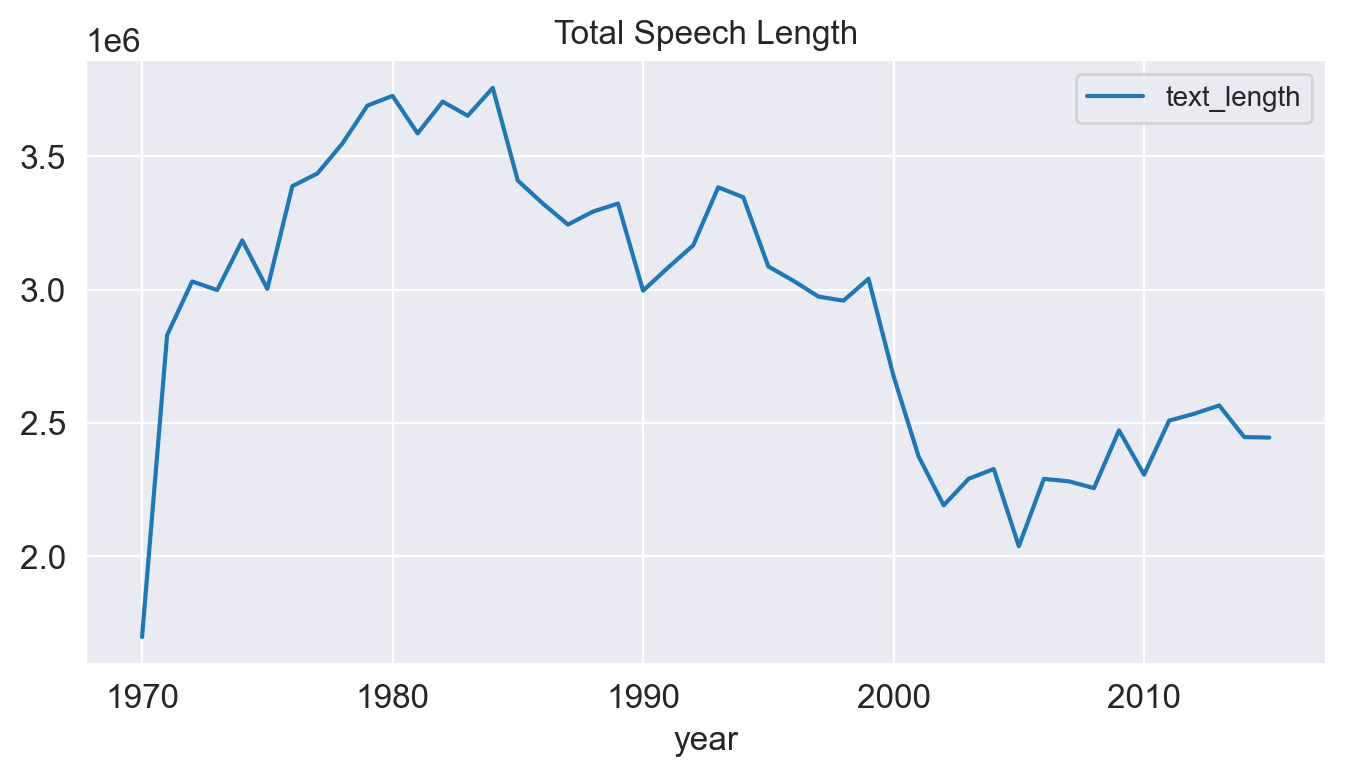

In [24]:
df.groupby("year").agg({"text_length":"sum"}).plot(title="Total Speech Length",
                                                    )

In [27]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [28]:
text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


In [29]:
stopwords = set(nltk.corpus.stopwords.words("english"))
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [30]:
include_stopwords = {"dear", "regards", "must", "would", "also"}
exclude_stopwords = {"against"}
stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [31]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens=text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [32]:
df["tokens"] = df["text"].apply(prepare, pipeline=pipeline)

In [33]:
df.head()

,session,year,country,country_name,speaker,position,text,text_length,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...,51419,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a...",29286,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to thi...",31839,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,"155.\t May I begin by expressing to Ambassador Hambro, on behalf of the delegation of Austria, our best wishes on his election as President of th...",26616,"[may, begin, expressing, ambassador, hambro, behalf, delegation, austria, best, wishes, election, president, general, assembly, derive, great, sat..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to this rostrum, wonders about the usefulness or futility of the speech. Must we still speak when our v...",25911,"[doubt, us, coming, rostrum, wonders, usefulness, futility, speech, still, speak, voices, drowned, mournful, cries, many, victims, world, disorder..."


In [34]:
df["token_count"] = df["tokens"].apply(len)
df.head()

,session,year,country,country_name,speaker,position,text,text_length,tokens,token_count
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the congratulations of the Albanian delegation on his election to the Presidency of the twenty-fifth sessi...,51419,"[may, first, convey, president, congratulations, albanian, delegation, election, presidency, twenty-fifth, session, general, assembly, taking, wor...",4125
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,"177.\t : It is a fortunate coincidence that precisely at a time when the United Nations is celebrating its first twenty-five years of existence, a...",29286,"[fortunate, coincidence, precisely, time, united, nations, celebrating, first, twenty-five, years, existence, eminent, jurist, closely, linked, or...",2327
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,"100.\t It is a pleasure for me to extend to you, Mr. President, the warmest congratulations of the Australia Government and its delegation to thi...",31839,"[pleasure, extend, mr, president, warmest, congratulations, australia, government, delegation, general, assembly, election, presidency, distinguis...",2545
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,"155.\t May I begin by expressing to Ambassador Hambro, on behalf of the delegation of Austria, our best wishes on his election as President of th...",26616,"[may, begin, expressing, ambassador, hambro, behalf, delegation, austria, best, wishes, election, president, general, assembly, derive, great, sat...",2135
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to this rostrum, wonders about the usefulness or futility of the speech. Must we still speak when our v...",25911,"[doubt, us, coming, rostrum, wonders, usefulness, futility, speech, still, speak, voices, drowned, mournful, cries, many, victims, world, disorder...",2025


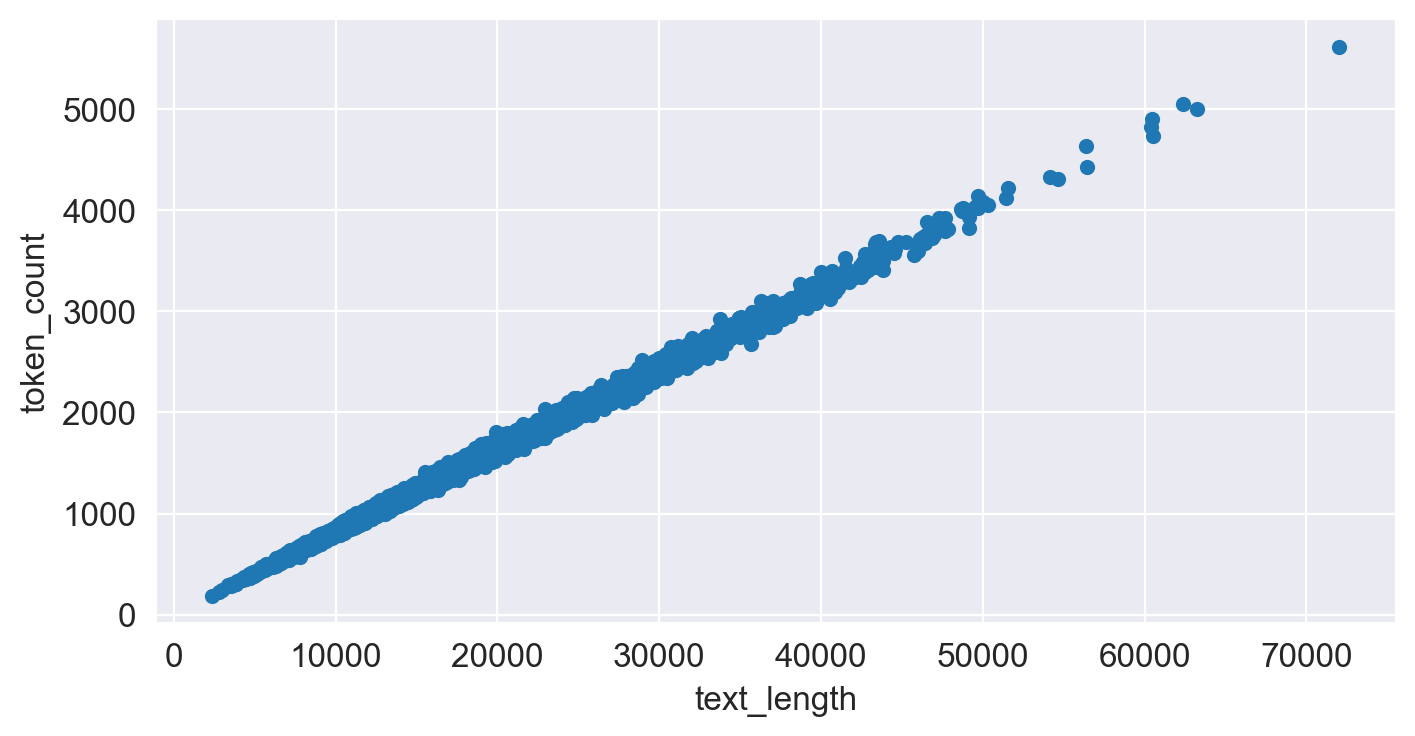

In [35]:
df.plot(kind="scatter", y="token_count", x="text_length")

## Blueprint: Counting Words with a Counter

In [36]:
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa")
counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [37]:
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)

In [38]:
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [39]:
counter = Counter()
df["tokens"].map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: tokens, Length: 7507, dtype: object

In [40]:
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [41]:
def count_words(df, column="tokens", preprocess=None, min_freq=2):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
        
    counter = Counter()
    df[column].map(update)
    
    freq_df = pd.DataFrame.from_dict(counter, orient="index", columns=["freq"])
    freq_df = freq_df.query("freq >= @min_freq")
    freq_df.index.name = "token"
    
    return freq_df.sort_values("freq", ascending=False)

In [59]:
freq_df = count_words(df)
freq_df.head()

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [43]:
count_words(df, column="text",
           preprocess=lambda text: re.findall(r"\w{10,}", text)).head()

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


## Blueprint: Creating a Frequency Diagram

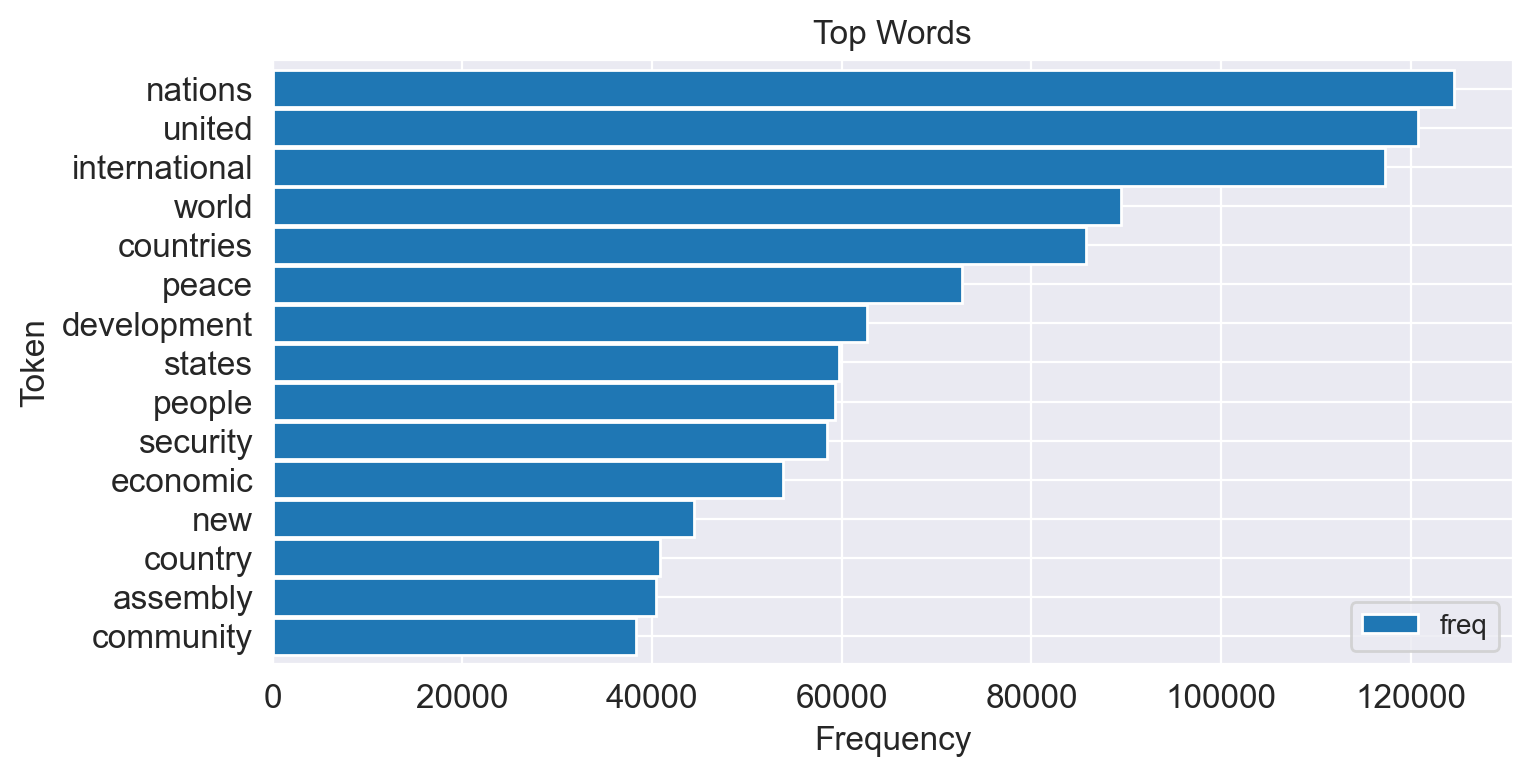

In [46]:
ax=freq_df.head(15).plot(kind="barh", width=0.95)
ax.invert_yaxis()
ax.set(xlabel="Frequency", ylabel="Token", title="Top Words");

## Blueprint: Creating Word Clouds

In [48]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

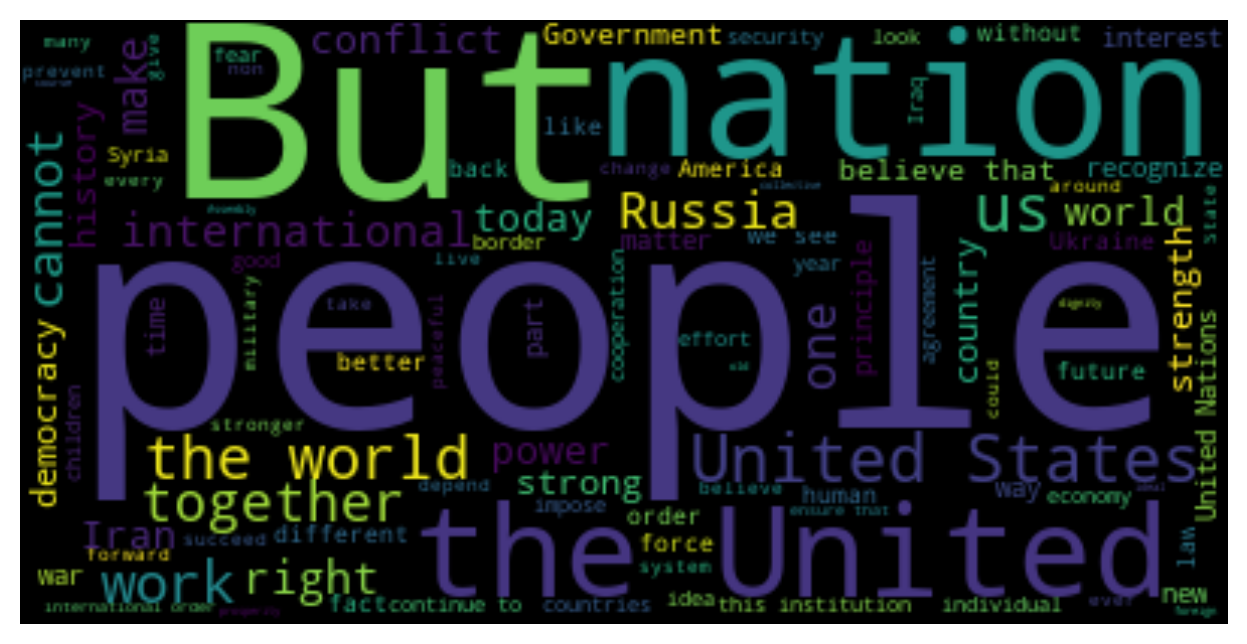

In [50]:
text = df.query("year==2015 and country=='USA'")["text"].values[0]
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [51]:
def make_wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    
    wc = WordCloud(width=800, height=400,
                   background_color="black", colormap="Paired",
                   max_font_size=150, max_words=max_words)
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_frequencies
        
    if stopwords is not None:
        counter = {token:freq for (token,freq) in counter.items()
                   if token not in stopwords}
    wc.generate_from_frequencies(counter)
    
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")

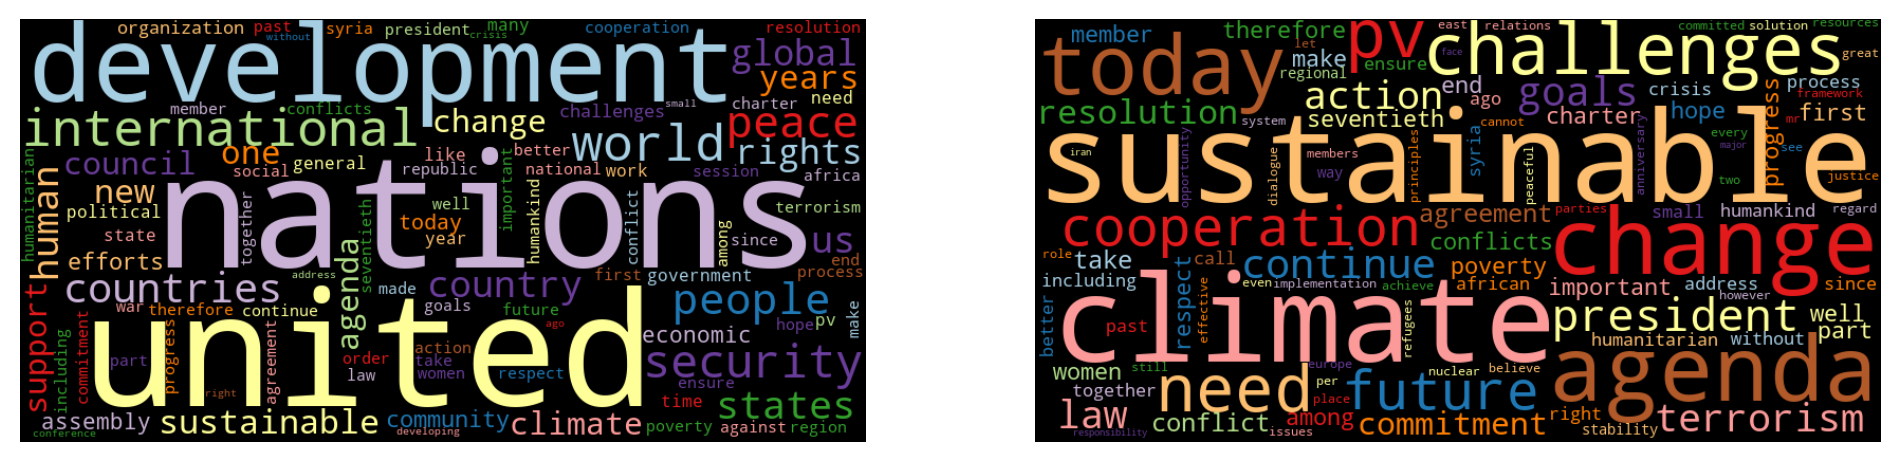

In [55]:
freq_2015_df = count_words(df[df["year"] == 2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
make_wordcloud(freq_2015_df["freq"], max_words=100)

plt.subplot(1,2,2)
make_wordcloud(freq_2015_df["freq"], max_words=100, stopwords=freq_df.head(50).index)

## Blueprint: Ranking with TF-IDF

In [56]:
def idf(df, column="tokens", preprocess=None, min_df=2):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    
    counter = Counter()
    df[column].map(update)
    
    idf_df = pd.DataFrame.from_dict(counter, orient="index", columns=["df"])
    idf_df = idf_df[idf_df["df"] > min_df]
    idf_df["idf"] = np.log(len(df)/idf_df["df"]) + 0.1
    idf_df.index.name="token"
    return idf_df

In [60]:
idf_df = idf(df)
freq_df = freq_df.join(idf_df)
freq_df["tfidf"] = freq_df["freq"]*freq_df["idf"]
freq_df.head(15)

,freq,df,idf,tfidf
token,,,,
nations,124508,7495.00,0.10,12649.99
united,120763,7494.00,0.10,12285.61
international,117223,7466.00,0.11,12364.28
world,89421,7460.00,0.11,9503.71
countries,85734,7307.00,0.13,10888.49
peace,72625,7320.00,0.13,9094.51
development,62632,7213.00,0.14,8765.41
states,59713,7211.00,0.14,8373.45
people,59338,7142.00,0.15,8891.39


In [61]:
freq_1970 = count_words(df[df["year"] == 1970])
freq_2015 = count_words(df[df["year"] == 2015])
freq_1970["tfidf"] = freq_1970["freq"] * idf_df["idf"]
freq_2015["tfidf"] = freq_2015["freq"] * idf_df["idf"]

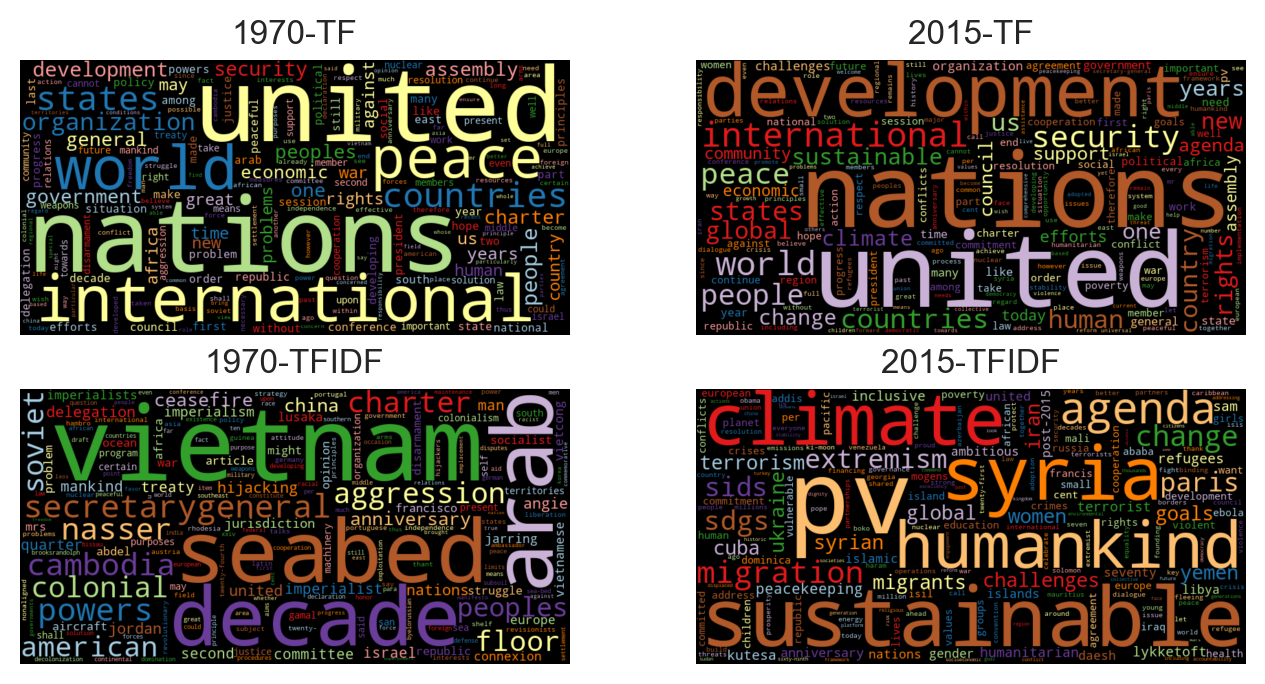

In [63]:
plt.figure()
plt.subplot(2,2,1)
make_wordcloud(freq_1970["freq"], title="1970-TF", 
          stopwords=["twenty-fifth", "twenty-five"])
plt.subplot(2,2,2)
make_wordcloud(freq_2015["freq"], title="2015-TF",
          stopwords=["seventieth"])
plt.subplot(2,2,3)
make_wordcloud(freq_1970["tfidf"], title="1970-TFIDF",
          stopwords=["twenty-fifth", "twenty-five"])
plt.subplot(2,2,4)
make_wordcloud(freq_2015["tfidf"], title="2015-TFIDF",
          stopwords=["seventieth"])

## Blueprint: Finding a Keyword in Context (KWIC)

In [65]:
from textacy.text_utils import KWIC

In [66]:
def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True,
                              window_width=window, print_only=False))
        
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
    for sample in random.sample(list(kwic_list), k):
        print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
              sample[1] + '  '+ \
              re.sub(r'[\n\t]', ' ', sample[2]))

In [67]:
kwic(df[df["year"] == 2015]["text"], "sdgs", print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
 and reviewing our progress on the   SDGs   throughout the next 15 years is vi
the Sustainable Development Goals (  SDGs  ) will require countries, both deve
the Sustainable Development Goals (  SDGs  ) will depend on revitalized and en
the Sustainable Development Goals (  SDGs  ) 15-29664 21/25  A/70/PV.23 01/10
national strategies to achieve the   SDGs  . The education sector, which has a


In [68]:
sdgs_kwic = kwic(df[df["year"] == 2015]["text"], "sdgs", print_samples=0)
sdgs_kwic[0]

('the Sustainable Development Goals (',
 'SDGs',
 ') will be an effective tool in glob')

## Blueprint: Analyzing N-Grams

In [72]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)

def ngrams(tokens, n=2, sep=" "):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

print("|".join(ngrams(tokens, 2)))
print("|".join(ngrams(tokens, 3)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change
the visible manifestation|visible manifestation of|manifestation of the|of the global|the global climate|global climate change


In [74]:
# Retaining only ngrams without stopwords
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords]) == 0]

tokens = prepare(text, [str.lower, tokenize])

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [75]:
df["bigrams"] = df["text"].apply(prepare, pipeline=[str.lower, tokenize])\
                          .apply(ngrams, n=2, stopwords=stopwords)
count_words(df, "bigrams").head()

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [76]:
idf_df = pd.concat([idf_df, idf(df, "bigrams", min_df=10)])

freq_df = count_words(df[df["year"] == 2015], "bigrams")
freq_df["tfidf"] = freq_df["freq"] * idf_df["idf"]

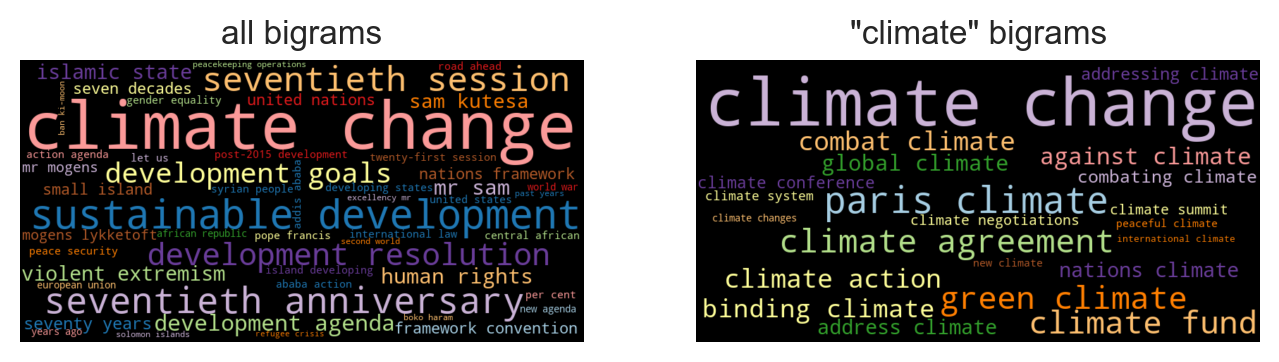

In [79]:
plt.figure()
plt.subplot(1,2,1)
make_wordcloud(freq_df["tfidf"], title="all bigrams", max_words=50)
plt.subplot(1,2,2)
where = freq_df.index.str.contains("climate")
make_wordcloud(freq_df[where]["tfidf"], title='"climate" bigrams', max_words=50)

## Blueprint: Comparing Frequencies across Time-Intervals and Categories

In [80]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k,0) for k in keywords] # 0 is default value

In [81]:
keywords = ["nuclear", "terrorism", "climate", "freedom"]
tokens = ["nuclear", "climate", "climate", "freedom", "climate", "freedom"]
print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [134]:
def count_keywords_by(df, by, column="tokens", keywords=keywords):
    
    freq_matrix = df["tokens"].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(data=freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [135]:
freq_df = count_keywords_by(df, by="year", keywords=keywords)
freq_df

,terrorism,terrorist,nuclear,war,oil,syria,syrian,refugees,migration,peacekeeping,humanitarian,climate,change,sustainable,sdgs
year,,,,,,,,,,,,,,,
1970,7,9,192,360,1,7,15,16,1,45,28,18,57,0,0
1971,9,8,275,468,10,16,21,161,1,17,64,35,94,0,0
1972,379,75,393,562,12,38,32,41,1,5,42,74,124,0,0
1973,124,19,347,612,24,45,14,29,0,5,51,79,157,0,0
1974,24,13,478,466,247,28,10,55,2,23,46,71,187,0,0
1975,20,9,578,497,68,14,7,56,0,5,36,53,173,1,0
1976,146,19,451,419,31,22,9,49,0,4,46,57,181,0,0
1977,75,30,675,428,45,14,1,54,2,4,54,58,156,0,0
1978,82,15,550,394,44,10,9,66,0,5,33,52,160,0,0


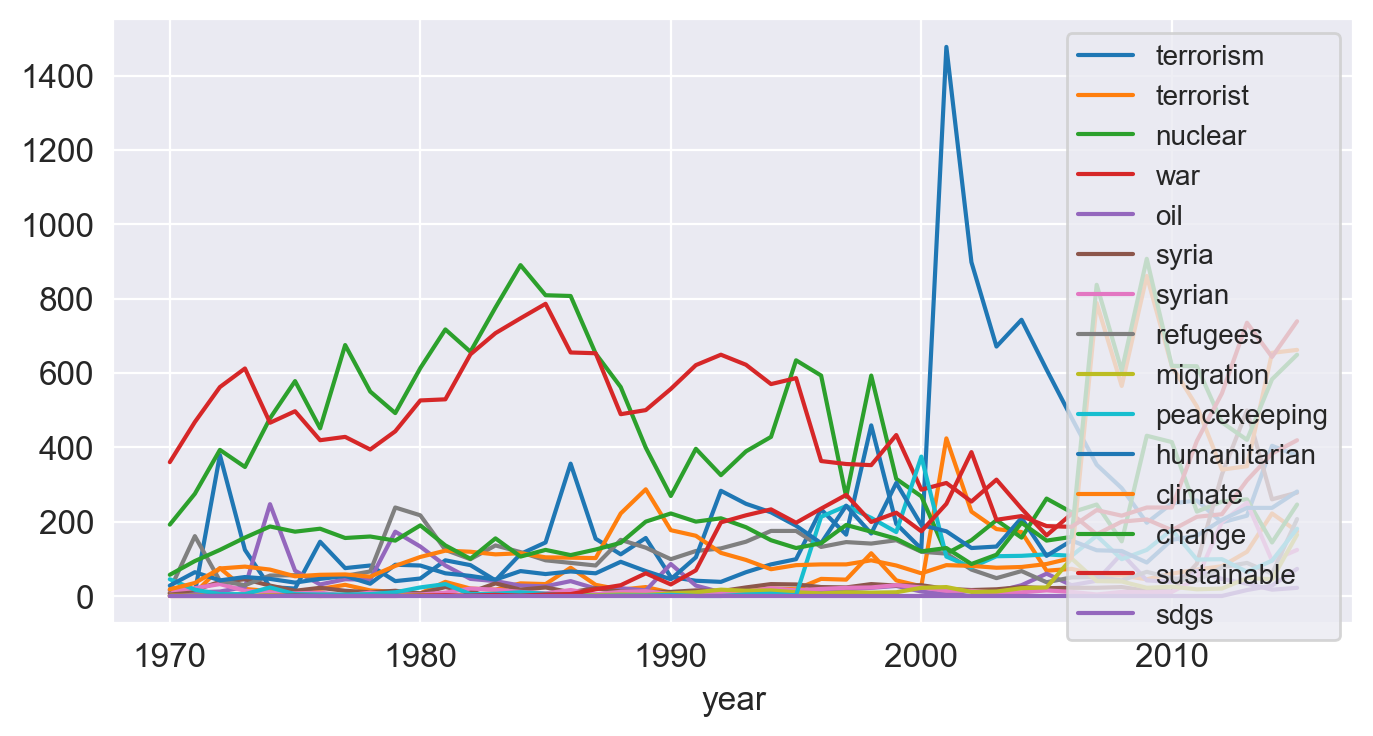

In [136]:
freq_df.plot()

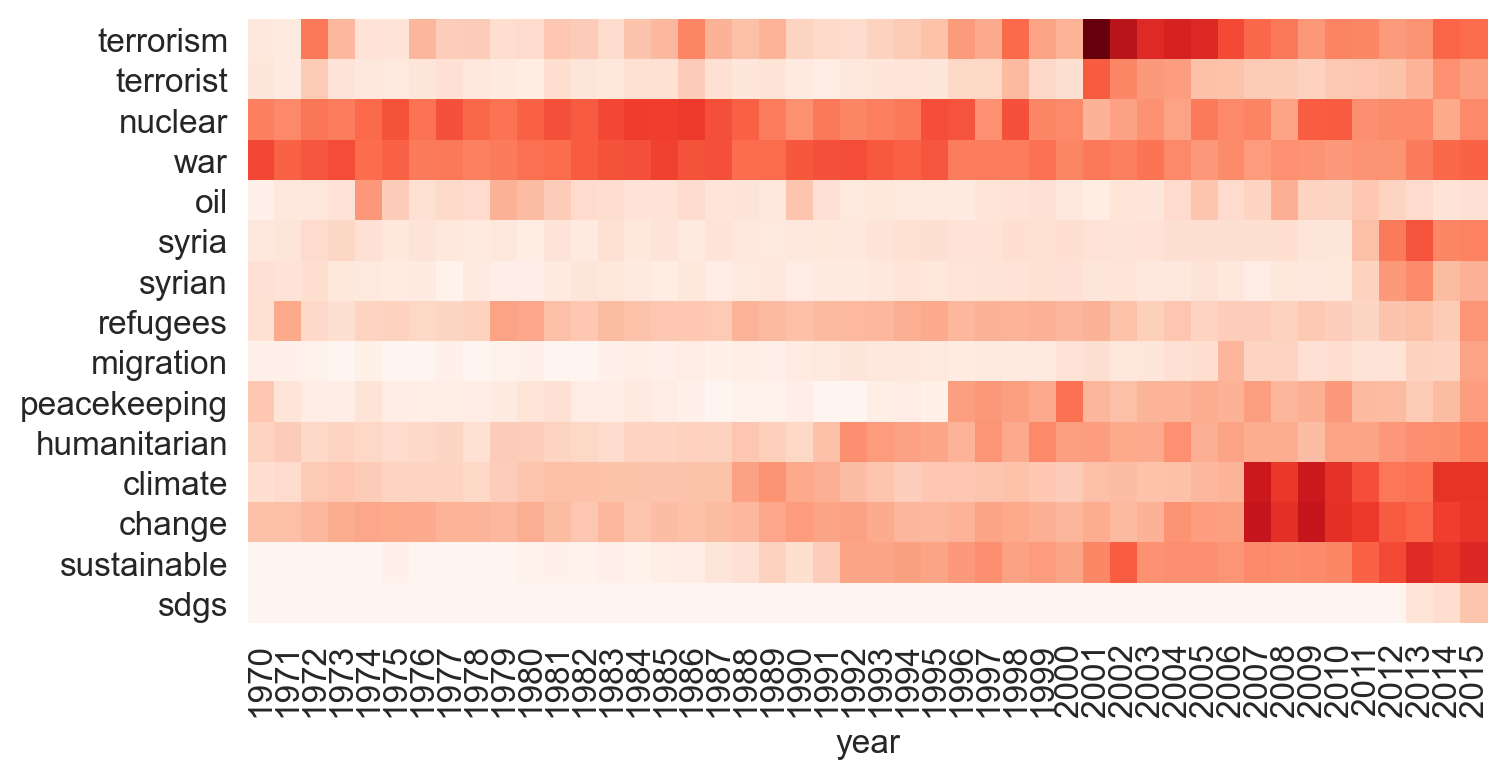

In [137]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping',
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']
freq_df = count_keywords_by(df, by="year", keywords=keywords)

freq_df = freq_df.div(df.groupby("year")["token_count"].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)
sns.heatmap(data=freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")

In [138]:
"CHN" in df["country"].unique()

True

In [139]:
chn_df = df[df["country"] == "CHN"]
chn_df.head()

,session,year,country,country_name,speaker,position,text,text_length,tokens,token_count,bigrams
86,26,1971,CHN,China,Mr. CHOW,NaN,"1.\t Mr. President, it is my pleasant duty, on behalf of my Government and delegation, as well as on my own behalf, to extend to you our most sin...",17198,"[mr, president, pleasant, duty, behalf, government, delegation, well, behalf, extend, sincere, felicitations, election, presidency, general, assem...",1422,"[mr president, pleasant duty, sincere felicitations, general assembly, fitting tribute, distinguished diplomatic, diplomatic career, chinese deleg..."
206,27,1972,CHN,China,Mr. Chiao,NaN,A number of important changes have taken place in the world situation since the twenty-sixth session of the United Nations General Assembly. A ser...,40684,"[number, important, changes, taken, place, world, situation, since, twenty-sixth, session, united, nations, general, assembly, series, new, victor...",3395,"[important changes, taken place, world situation, situation since, twenty-sixth session, united nations, nations general, general assembly, new vi..."
331,28,1973,CHN,China,Kuan-hua Chiao,NaN,"﻿Since the twenty-seventh session of the United Nations General Assembly, some notable events have successively taken place on the international a...",43499,"[since, twenty-seventh, session, united, nations, general, assembly, notable, events, successively, taken, place, international, arena, first, ces...",3589,"[twenty-seventh session, united nations, nations general, general assembly, notable events, successively taken, taken place, international arena, ..."
453,29,1974,CHN,China,Mr. Chia Kuan hua,NaN,"Mr. President, first of all, I should like to congratulate you on your election as President of the current session of the General Assembly and I ...",41481,"[mr, president, first, like, congratulate, election, president, current, session, general, assembly, confident, preside, well, make, positive, con...",3527,"[mr president, president first, current session, general assembly, preside well, make positive, positive contributions, current session, session n..."
582,30,1975,CHN,China,Mr. CHIAO,NaN,60. Profound changes have taken place in the international situation since the twenty-ninth session of the General Assembly. A serious capitalist ...,43470,"[profound, changes, taken, place, international, situation, since, twenty-ninth, session, general, assembly, serious, capitalist, economic, crisis...",3654,"[profound changes, taken place, international situation, situation since, twenty-ninth session, general assembly, serious capitalist, capitalist e..."


In [154]:
where_chn = df["country"] == "CHN"
chn_df = df[where_chn].reset_index()
chn_freq_df = count_keywords_by(chn_df, by="year", keywords=keywords)
where_usa = df["country"] == "USA"
usa_df = df[where_usa].reset_index()
usa_freq_df = count_keywords_by(usa_df, by="year", keywords=keywords)

[Text(0.5, 1.0, 'USA')]

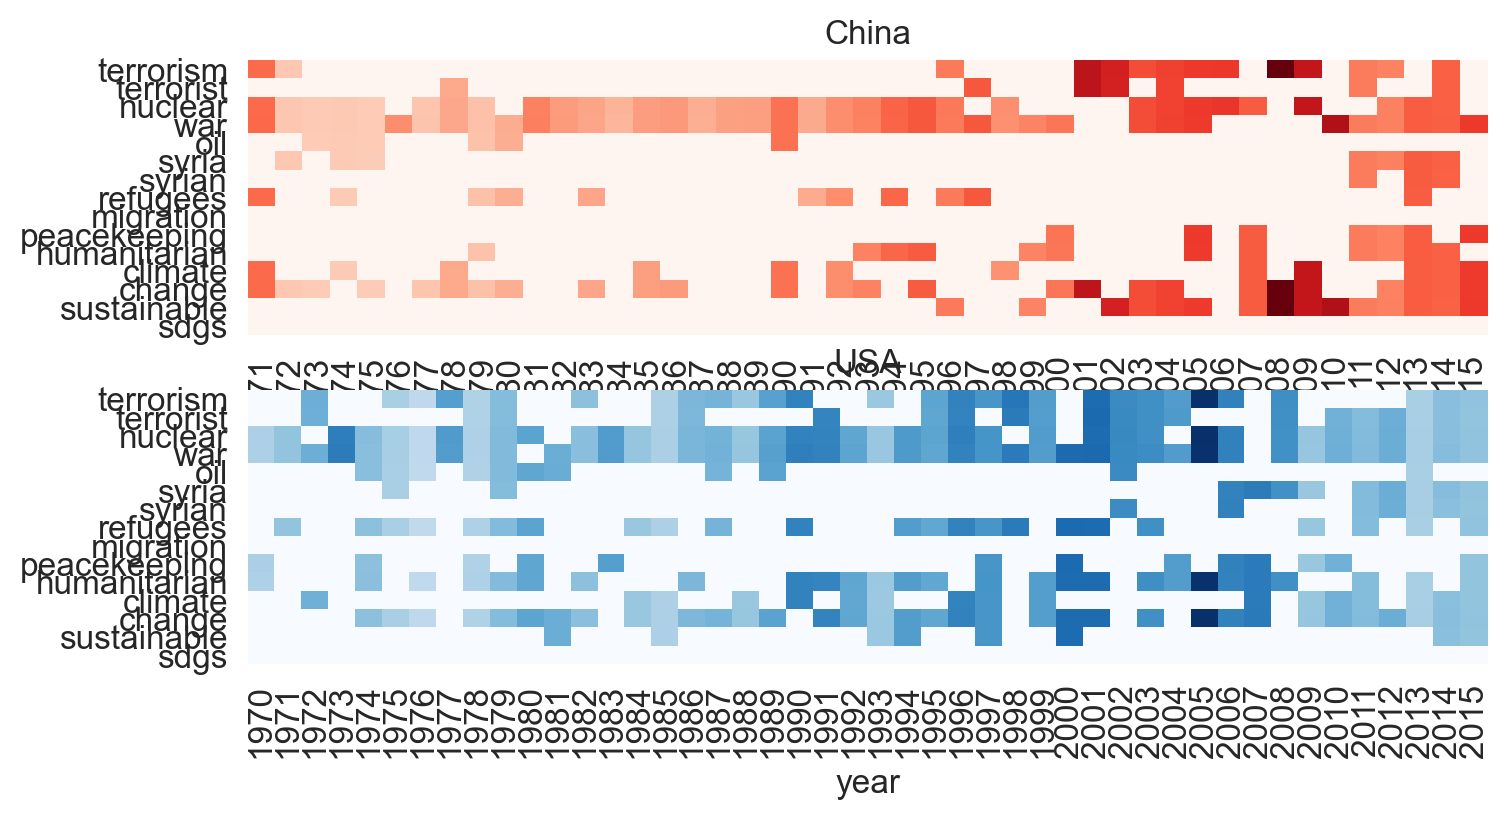

In [168]:
fig = plt.figure()
plt.subplot(2,1,1)
chn_freq_df = chn_freq_df.div(chn_df.groupby("year")["token_count"].sum(),
                              axis=0)
chn_freq_df = chn_freq_df.apply(np.sqrt)
ax = sns.heatmap(data=chn_freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
ax.set(title="China")
plt.subplot(2,1,2)
usa_freq_df = usa_freq_df.div(usa_df.groupby("year")["token_count"].sum(),
                              axis=0)
usa_freq_df = usa_freq_df.apply(np.sqrt)
ax = sns.heatmap(data=usa_freq_df.T,
            xticklabels=True, yticklabels=True, cbar=False, cmap="Blues")
ax.set(title="USA")

